<span style="color:#87CEEB; font-size:30px; font-weight:bold;">Desafío - Preparación de Datos y Gráficos</span><br>
<span style="font-size:15px;">Marcela Alejandra Barrera Puentes</span>

<span style="font-size:15px;">En este desafío validaremos nuestros conocimientos de preparación de datos y gráficos. Para lograrlo, necesitarás aplicar los contenidos vistos en clases y en la guía de estudios.<br>
Lee todo el documento antes de comenzar el desarrollo individual, para asegurarte de tener el máximo de puntaje y enfocar bien los esfuerzos.</span>

<span style="color:#87CEEB; font-size:20px; font-weight:bold;">Descripción</span><br>
<span style="font-size:15px;">La base de datos world-data-2023.csv proporciona una gran cantidad de información sobre todos los países del mundo, abarcando una amplia gama de indicadores y atributos. Incluye estadísticas demográficas, indicadores económicos, factores ambientales, métricas de atención médica, estadísticas educativas y mucho más. Con la representación de cada país, este conjunto de datos ofrece una perspectiva global completa sobre diversos aspectos de las naciones, lo que permite análisis en profundidad y comparaciones entre países. Las variables consideradas son:<br>

0. Country: Nombre del país.<br>
1. Density (P/Km2): Densidad de población medida en personas por kilómetro
cuadrado.<br>
2. Abbreviation: Abreviatura o código que representa el país.<br>
3. Agricultural Land (%): Porcentaje del área de tierra utilizada para fines agrícolas.<br>
4. Land Area (Km2): Área total de tierra del país en kilómetros cuadrados.<br>
5. Armed Forces Size: Tamaño de las fuerzas armadas en el país.<br>
6. Birth Rate: Número de nacimientos por 1,000 habitantes por año.<br>
7. Calling Code: Código de llamada internacional para el país.<br>
8. Capital/Major City: Nombre de la capital o ciudad principal.<br>
9. CO2 Emissions: Emisiones de dióxido de carbono en toneladas.<br>
10. CPI: Índice de Precios al Consumidor, una medida de la inflación y el poder
adquisitivo.<br>
11. CPI Change (%): Cambio porcentual en el Índice de Precios al Consumidor en
comparación con el año anterior.<br>
12. Currency_Code: Código de moneda utilizado en el país.<br>
13. Fertility Rate: Número promedio de hijos nacidos de una mujer durante su vida.<br>
14. Forested Area (%): Porcentaje del área de tierra cubierta por bosques.<br>
15. Gasoline_Price: Precio de la gasolina por litro en moneda local.<br>
16. GDP: Producto Interno Bruto, el valor total de bienes y servicios producidos en el
país.<br>
17. Gross Primary Education Enrollment (%): Tasa de inscripción bruta en educación primaria.<br>
18. Gross Tertiary Education Enrollment (%): Tasa de inscripción bruta en educación terciaria.<br>
19. Infant Mortality: Número de muertes por cada 1,000 nacidos vivos antes de cumplir un año de edad.<br>
20. Largest City: Nombre de la ciudad más grande del país.<br>
21. Life Expectancy: Número promedio de años que se espera que viva un recién
nacido.<br>
22. Maternal Mortality Ratio: Número de muertes maternas por cada 100,000
nacidos vivos.<br>
23. Minimum Wage: Nivel de salario mínimo en moneda local.<br>
24. Official Language: Idioma(s) oficial(es) hablado(s) en el país.<br>
25. Out of Pocket Health Expenditure (%): Porcentaje del gasto total en salud
pagado directamente por los individuos.<br>
26. Physicians per Thousand: Número de médicos por cada mil personas.
27. Population: Población total del país.<br>
28. Population: Labor Force Participation (%): Porcentaje de la población que forma
parte de la fuerza laboral.<br>
29. Tax Revenue (%): Ingresos fiscales como porcentaje del PIB.<br>
30. Total Tax Rate: Carga tributaria total como porcentaje de las ganancias
comerciales.<br>
31. Unemployment Rate: Porcentaje de la fuerza laboral que está desempleada.<br>
32. Urban Population: Porcentaje de la población que vive en áreas urbanas.<br>
33. Latitude: Coordenada de latitud de la ubicación del país.<br>
34. Longitude: Coordenada de longitud de la ubicación del país.<br>
</span>

In [348]:
# Se importa librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mode
from scipy.stats import norm
from sklearn.mixture import GaussianMixture
import warnings
warnings.filterwarnings("ignore")
# Se lee el archivo csv: world-data-2023.csv
df_original = pd.read_csv('/Users/marce/Projects_Marce/Desafio_Latam/world-data-2023.csv', delimiter = ',')

In [350]:
# Buena práctica: se da una mirada a las primeras filas del DataFrame y las columnas que lo conforman
print(df_original.head())

       Country Density\n(P/Km2) Abbreviation Agricultural Land( %)  \
0  Afghanistan               60           AF                58.10%   
1      Albania              105           AL                43.10%   
2      Algeria               18           DZ                17.40%   
3      Andorra              164           AD                40.00%   
4       Angola               26           AO                47.50%   

  Land Area(Km2) Armed Forces size  Birth Rate  Calling Code  \
0        652,230           323,000       32.49          93.0   
1         28,748             9,000       11.78         355.0   
2      2,381,741           317,000       24.28         213.0   
3            468               NaN        7.20         376.0   
4      1,246,700           117,000       40.73         244.0   

  Capital/Major City Co2-Emissions  ... Out of pocket health expenditure  \
0              Kabul         8,672  ...                           78.40%   
1             Tirana         4,536  ...   

<span style="font-size:15px;">Se observan las 35 columnas tal y como se describió en el enunciado [desde la 0 a la 34]</span>

In [353]:
# Buena práctica: se observa el tipo de datos
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    object 
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    object 
 4   Land Area(Km2)                             194 non-null    object 
 5   Armed Forces size                          171 non-null    object 
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    object 
 10  CPI                       

<span style="font-size:15px;">Se observa que 9 de las 35 columnas son del tipo de dato float64 y todos los demás datos son tipo ojbect [26 columnas].
Esto último es razonable por ejemplo para un campo como Country o Abbreviation, sin embargo, un campo como Urban Population,
Unemployment Rate, entre otros, es intuitivamente esperable que tenga alguna configuración numérica.
Se indagará respecto a esto más adelante si es necesario.
Se observan datos omitidos dentro de los registros, es así como los campos que tienen más registros alcanzan los 195, mientras que
los que registran menos data contienen 150 registros</span>

In [356]:
# Buena práctica: se genera un resumen estadístico para las 9 columnas numéricas con df.describe()
df_original.describe()

,Birth Rate,Calling Code,Fertility Rate,Infant mortality,Life expectancy,Maternal mortality ratio,Physicians per thousand,Latitude,Longitude
count,189.000000,194.000000,188.000000,189.000000,187.000000,181.000000,188.000000,194.000000,194.000000
mean,20.214974,360.546392,2.698138,21.332804,72.279679,160.392265,1.839840,19.092351,20.232434
std,9.945774,323.236419,1.282267,19.548058,7.483661,233.502024,1.684261,23.961779,66.716110
min,5.900000,1.000000,0.980000,1.400000,52.800000,2.000000,0.010000,-40.900557,-175.198242
25%,11.300000,82.500000,1.705000,6.000000,67.000000,13.000000,0.332500,4.544175,-7.941496
50%,17.950000,255.500000,2.245000,14.000000,73.200000,53.000000,1.460000,17.273849,20.972652
75%,28.750000,506.750000,3.597500,32.700000,77.500000,186.000000,2.935000,40.124603,48.281523
max,46.080000,1876.000000,6.910000,84.500000,85.400000,1150.000000,8.420000,64.963051,178.065032


<span style="font-size:15px;">En promedio, sin haber realizado limpieza de datos:<br>
[1] nacen 20 niños por cada 1.000 habitantes por año<br>
[2] nacen entre 2 y 3 niños de una mujer en toda su vida<br>
[3] mueren 21 niños por cada 1.000 nacidos vivos antes de cumplir 1 año de edad<br>
[4] se espera que un recién nacido viva en torno a los 72 años<br>
[5] mueren cerca de 160 madres por cada 100.000 nacidos vivos<br>
[6] existen casi 2 médicos por cada 1.000 personas<br>
</span>

In [359]:
# Se determinan valores nulos
df_original.apply(lambda x: sum(x.isnull()), axis=0)

Country                                       0
Density\n(P/Km2)                              0
Abbreviation                                  7
Agricultural Land( %)                         7
Land Area(Km2)                                1
Armed Forces size                            24
Birth Rate                                    6
Calling Code                                  1
Capital/Major City                            3
Co2-Emissions                                 7
CPI                                          17
CPI Change (%)                               16
Currency-Code                                15
Fertility Rate                                7
Forested Area (%)                             7
Gasoline Price                               20
GDP                                           2
Gross primary education enrollment (%)        7
Gross tertiary education enrollment (%)      12
Infant mortality                              6
Largest city                            

<span style="color:#87CEEB; font-size:20px; font-weight:bold;">1.</span>
<span style="font-size:15px;">Carga los datos y genera un dataFrame que excluya las columnas correspondientes a la abreviatura del país, código de llamada, capital, código de moneda, ciudad más grande, lenguaje oficial, latitud y longitud. Considerando estos datos, realiza una inspección inicial sobre ellos, considerando gráficos. Concluye.</span><br>

<span style="color:#87CEEB; font-size:20px; font-weight:bold;">2.</span>
<span style="font-size:15px;">De las variables codificadas numéricamente, ¿hay pares de ellas en la que parezca
haber correlación? ¿Para cuál(es) de ellas se observa más claramente?</span><br>

In [363]:
# Se eliminan las columnas solicitadas en el punto  2
df = df_original.drop(['Abbreviation','Calling Code','Capital/Major City','Currency-Code','Largest city','Official language','Latitude','Longitude'],axis=1)
# Se observa el tipo de datos
df.info()
# Se genera un resumen estadístico para las 6 columnas numéricas con df.describe()
df.describe()
# Se determinan valores nulos
df.apply(lambda x: sum(x.isnull()), axis=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 27 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    object 
 2   Agricultural Land( %)                      188 non-null    object 
 3   Land Area(Km2)                             194 non-null    object 
 4   Armed Forces size                          171 non-null    object 
 5   Birth Rate                                 189 non-null    float64
 6   Co2-Emissions                              188 non-null    object 
 7   CPI                                        178 non-null    object 
 8   CPI Change (%)                             179 non-null    object 
 9   Fertility Rate                             188 non-null    float64
 10  Forested Area (%)         

Country                                       0
Density\n(P/Km2)                              0
Agricultural Land( %)                         7
Land Area(Km2)                                1
Armed Forces size                            24
Birth Rate                                    6
Co2-Emissions                                 7
CPI                                          17
CPI Change (%)                               16
Fertility Rate                                7
Forested Area (%)                             7
Gasoline Price                               20
GDP                                           2
Gross primary education enrollment (%)        7
Gross tertiary education enrollment (%)      12
Infant mortality                              6
Life expectancy                               8
Maternal mortality ratio                     14
Minimum wage                                 45
Out of pocket health expenditure              7
Physicians per thousand                 

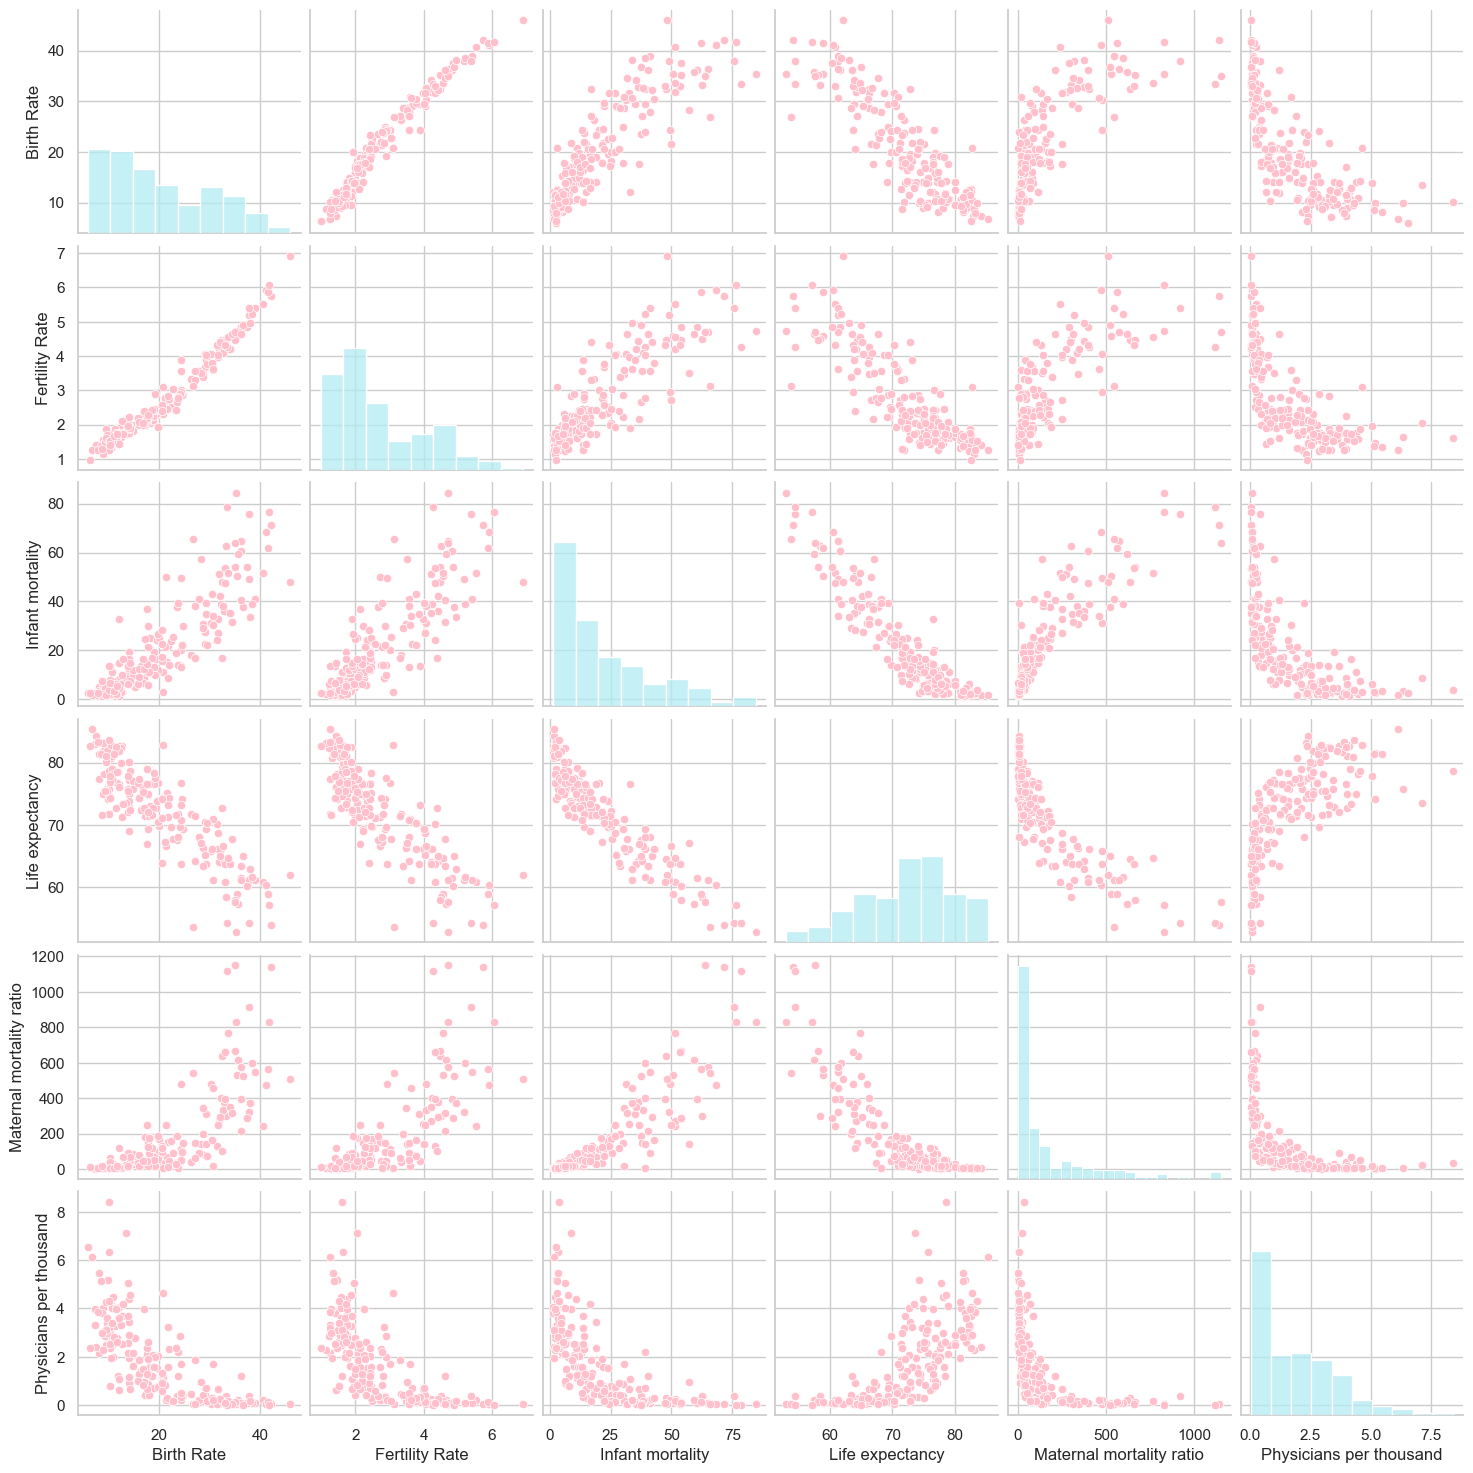

In [365]:
# Se explora gráficamente a través de Pairplot
sns.pairplot(df, diag_kind='hist', plot_kws={'color':'#FFC0CB'}, diag_kws={'color':'#B2EBF2'})

<span style="font-size:15px;">Los 6 campos float64 han sido graficados en Pairplot para comprender visualmente todas las combinaciones posibles de pares de variables en el conjunto de datos del DataFrame. Para los gráficos diagonales en celeste se han escogido histogramas<br>
Algunas conclusiones preliminares son:<br>
Birth Rate y Fertility Rate: existe una correlación positiva<br>
Birth Rate y Infant mortality: si bien se puede apreciar una correlación positiva, es más dispersa y menos evidente, lo que hace pensar que algo más explica de manera más directa Infant mortality<br>
Birth Rate y Life expectancy: se observa una correlación negativa relativa ya que existen algunos datos dispersos<br>
Birth Rate y Maternal mortality ratio: la correlación si bien no es tan directa existe una tendencia a una correlación postiva<br>
Birth Rate y Physicians per thousand: la correlación si bien no es tan directa existe una tendencia a una correlación negativa, algo logarítmica<br>
Fertility Rate e Infant mortality: correlación positiva relativa no tan directa<br>
Fertility Rate y Life expectancy: correlación negativa relativa no tan directa<br>
Fertility Rate y Maternal mortality ratio: la correlación si bien no es tan directa existe una tendencia a una correlación postiva<br>
Fertility Rate y Physicians per thousand: la correlación si bien no es tan directa existe una tendencia a una correlación negativa, algo logarítmica<br>
Infant mortality y Life expectancy: correlación negativa no tan directa<br>
Infant mortality y Maternal mortality ratio: la relación no es directa, sin embargo, existe una tendencia a una correlación positiva<br>
Infant mortalityy Physicians per thousand: la correlación si bien no es tan directa existe una tendencia a una correlación negativa, algo logarítmica<br>
Life expectancy y Maternal mortality ratio: correlación relativa negativa<br>
Life expectancy y Physicians per thousand: correlación relativa positiva<br>
Maternal mortality ratio y Physicians per thousand: correlación relativa negativa logarítmica<br>
</span>

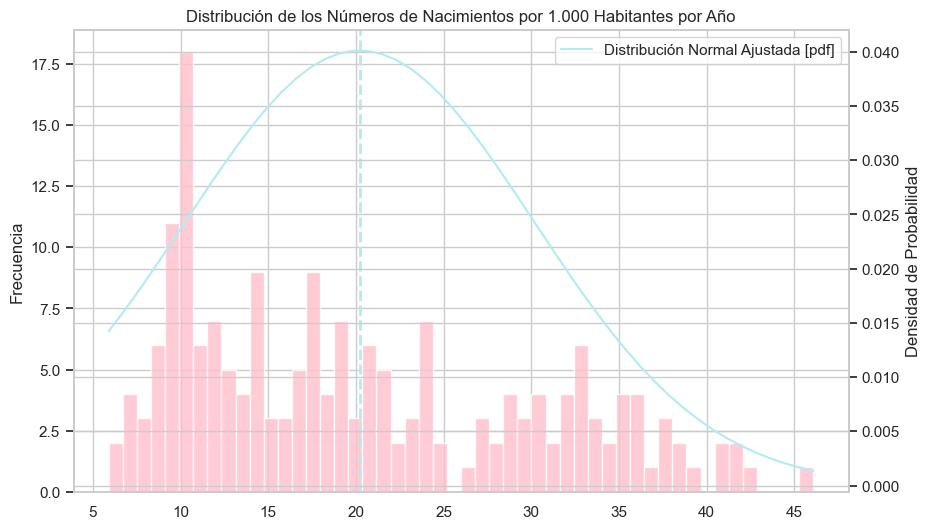

El promedio de los Números de Nacimientos por 1.000 Habitantes por Año es: 20.21
La mediana de los Números de Nacimientos por 1.000 Habitantes por Año es: 17.95
La(s) moda(s) de los Números de Nacimientos por 1.000 Habitantes por Año es(son):
10.00
12.00
La desviación estándar de los Números de Nacimientos por 1.000 Habitantes por Año es: 9.95
Los quintiles de los Números de Nacimientos por 1.000 Habitantes por Año son:
0.2    10.376
0.4    14.884
0.6    20.760
0.8    31.072
1.0    46.080
Name: Birth Rate, dtype: float64
El rango de los Números de Nacimientos por 1.000 Habitantes por Año es: 40.18


In [367]:
# Se utiliza Birth Rate para exploración de medidas estadísticas y gráficas
promedio = df['Birth Rate'].mean()
mediana = df['Birth Rate'].median()
moda = df['Birth Rate'].mode()
desviacion_std = df['Birth Rate'].std()
quintiles = df['Birth Rate'].quantile([0.2, 0.4, 0.6, 0.8, 1.0])
rango = df['Birth Rate'].max() - df['Birth Rate'].min()
mínimo = df['Birth Rate'].min()
máximo = df['Birth Rate'].max()
# Se genera puntos en el rango de valores mínimo y máximo de Birth Rate
x = np.linspace(mínimo, máximo)
# Se calcula la función de densidad de probabilidad [pdf] para la distribución normal
pdf = norm.pdf(x,loc=promedio,scale=desviacion_std)


fig, ax1 = plt.subplots(figsize=(10,6))
ax1.hist(df['Birth Rate'], bins=50, color='#FFC0CB', alpha=0.8, label='Rosado pastel')
ax1.axvline(x=promedio, color='#B2EBF2', linestyle='dashed', linewidth=2, label='Promedio')

ax2 = ax1.twinx()
ax2.plot(x, pdf, color='#B2EBF2', label='Distribución Normal Ajustada [pdf]')

ax1.set_ylabel('Frecuencia')
ax2.set_ylabel('Densidad de Probabilidad')

plt.title('Distribución de los Números de Nacimientos por 1.000 Habitantes por Año')
plt.xlabel('Números de Nacimientos por 1.000 Habitantes por Año')
plt.grid(True)
plt.legend()
plt.show()
# Se muestra resultados
print(f"El promedio de los Números de Nacimientos por 1.000 Habitantes por Año es: {promedio:.2f}")
print(f"La mediana de los Números de Nacimientos por 1.000 Habitantes por Año es: {mediana:.2f}")
print(f"La(s) moda(s) de los Números de Nacimientos por 1.000 Habitantes por Año es(son):")
for m in moda:
    print(F"{m:.2f}")
print(f"La desviación estándar de los Números de Nacimientos por 1.000 Habitantes por Año es: {desviacion_std:.2f}")
print(f"Los quintiles de los Números de Nacimientos por 1.000 Habitantes por Año son:")
print(quintiles)
print(f"El rango de los Números de Nacimientos por 1.000 Habitantes por Año es: {rango:.2f}")

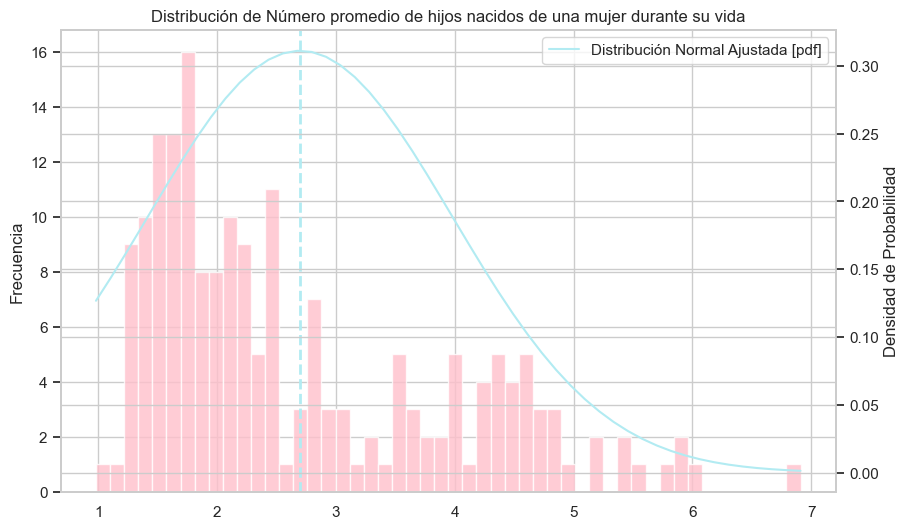

El promedio de Número promedio de hijos nacidos de una mujer durante su vida es: 2.70
La mediana de Número promedio de hijos nacidos de una mujer durante su vida es: 2.25
La(s) moda(s) de Número promedio de hijos nacidos de una mujer durante su vida es(son):
1.73
La desviación estándar de Número promedio de hijos nacidos de una mujer durante su vida es: 1.28
Los quintiles de Número promedio de hijos nacidos de una mujer durante su vida son:
0.2    1.608
0.4    1.990
0.6    2.468
0.8    4.046
1.0    6.910
Name: Fertility Rate, dtype: float64
El rango de Número promedio de hijos nacidos de una mujer durante su vida es: 5.93


In [368]:
# Se utiliza Fertility Rate para exploración de medidas estadísticas y gráficas
promedio = df['Fertility Rate'].mean()
mediana = df['Fertility Rate'].median()
moda = df['Fertility Rate'].mode()
desviacion_std = df['Fertility Rate'].std()
quintiles = df['Fertility Rate'].quantile([0.2, 0.4, 0.6, 0.8, 1.0])
rango = df['Fertility Rate'].max() - df['Fertility Rate'].min()
mínimo = df['Fertility Rate'].min()
máximo = df['Fertility Rate'].max()
# Se genera puntos en el rango de valores mínimo y máximo de Fertility Rate
x = np.linspace(mínimo, máximo)
# Se calcula la función de densidad de probabilidad [pdf] para la distribución normal
pdf = norm.pdf(x,loc=promedio,scale=desviacion_std)


fig, ax1 = plt.subplots(figsize=(10,6))
ax1.hist(df['Fertility Rate'], bins=50, color='#FFC0CB', alpha=0.8, label='Rosado pastel')
ax1.axvline(x=promedio, color='#B2EBF2', linestyle='dashed', linewidth=2, label='Promedio')

ax2 = ax1.twinx()
ax2.plot(x, pdf, color='#B2EBF2', label='Distribución Normal Ajustada [pdf]')

ax1.set_ylabel('Frecuencia')
ax2.set_ylabel('Densidad de Probabilidad')

plt.title('Distribución de Número promedio de hijos nacidos de una mujer durante su vida')
plt.xlabel('Número promedio de hijos nacidos de una mujer durante su vida')
plt.grid(True)
plt.legend()
plt.show()
# Se muestra resultados
print(f"El promedio de Número promedio de hijos nacidos de una mujer durante su vida es: {promedio:.2f}")
print(f"La mediana de Número promedio de hijos nacidos de una mujer durante su vida es: {mediana:.2f}")
print(f"La(s) moda(s) de Número promedio de hijos nacidos de una mujer durante su vida es(son):")
for m in moda:
    print(F"{m:.2f}")
print(f"La desviación estándar de Número promedio de hijos nacidos de una mujer durante su vida es: {desviacion_std:.2f}")
print(f"Los quintiles de Número promedio de hijos nacidos de una mujer durante su vida son:")
print(quintiles)
print(f"El rango de Número promedio de hijos nacidos de una mujer durante su vida es: {rango:.2f}")

<span style="font-size:15px;">Llama la atención que es posible observar 2 poblaciones con una distribución normal relativa: de 0 a 3.5  y de 3.5 a 7 </span>

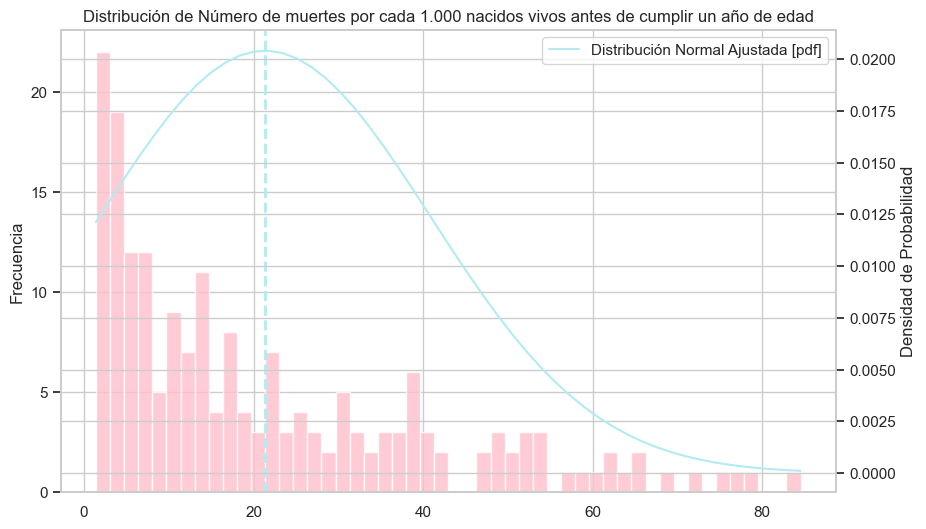

El promedio de Número de muertes por cada 1.000 nacidos vivos antes de cumplir un año de edad es: 21.33
La mediana de Número de muertes por cada 1.000 nacidos vivos antes de cumplir un año de edad es: 14.00
La(s) moda(s) de Número de muertes por cada 1.000 nacidos vivos antes de cumplir un año de edad es(son):
3.10
3.60
6.10
La desviación estándar de Número de muertes por cada 1.000 nacidos vivos antes de cumplir un año de edad es: 19.55
Los quintiles de Número de muertes por cada 1.000 nacidos vivos antes de cumplir un año de edad son:
0.2     4.18
0.4    11.02
0.6    19.92
0.8    37.76
1.0    84.50
Name: Infant mortality, dtype: float64
El rango de Número de muertes por cada 1.000 nacidos vivos antes de cumplir un año de edad es: 83.10


In [370]:
# Se utiliza Infant mortality para exploración de medidas estadísticas y gráficas
promedio = df['Infant mortality'].mean()
mediana = df['Infant mortality'].median()
moda = df['Infant mortality'].mode()
desviacion_std = df['Infant mortality'].std()
quintiles = df['Infant mortality'].quantile([0.2, 0.4, 0.6, 0.8, 1.0])
rango = df['Infant mortality'].max() - df['Infant mortality'].min()
mínimo = df['Infant mortality'].min()
máximo = df['Infant mortality'].max()
# Se genera puntos en el rango de valores mínimo y máximo de Infant mortality
x = np.linspace(mínimo, máximo)
# Se calcula la función de densidad de probabilidad [pdf] para la distribución normal
pdf = norm.pdf(x,loc=promedio,scale=desviacion_std)


fig, ax1 = plt.subplots(figsize=(10,6))
ax1.hist(df['Infant mortality'], bins=50, color='#FFC0CB', alpha=0.8, label='Rosado pastel')
ax1.axvline(x=promedio, color='#B2EBF2', linestyle='dashed', linewidth=2, label='Promedio')

ax2 = ax1.twinx()
ax2.plot(x, pdf, color='#B2EBF2', label='Distribución Normal Ajustada [pdf]')

ax1.set_ylabel('Frecuencia')
ax2.set_ylabel('Densidad de Probabilidad')

plt.title('Distribución de Número de muertes por cada 1.000 nacidos vivos antes de cumplir un año de edad')
plt.xlabel('Número de muertes por cada 1.000 nacidos vivos antes de cumplir un año de edad')
plt.grid(True)
plt.legend()
plt.show()
# Se muestra resultados
print(f"El promedio de Número de muertes por cada 1.000 nacidos vivos antes de cumplir un año de edad es: {promedio:.2f}")
print(f"La mediana de Número de muertes por cada 1.000 nacidos vivos antes de cumplir un año de edad es: {mediana:.2f}")
print(f"La(s) moda(s) de Número de muertes por cada 1.000 nacidos vivos antes de cumplir un año de edad es(son):")
for m in moda:
    print(F"{m:.2f}")
print(f"La desviación estándar de Número de muertes por cada 1.000 nacidos vivos antes de cumplir un año de edad es: {desviacion_std:.2f}")
print(f"Los quintiles de Número de muertes por cada 1.000 nacidos vivos antes de cumplir un año de edad son:")
print(quintiles)
print(f"El rango de Número de muertes por cada 1.000 nacidos vivos antes de cumplir un año de edad es: {rango:.2f}")

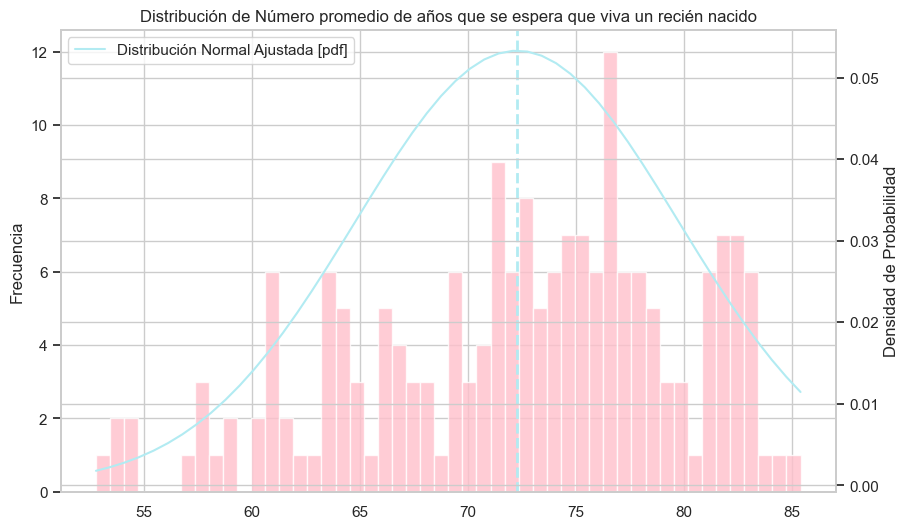

El promedio de Número promedio de años que se espera que viva un recién nacido es: 72.28
La mediana de Número promedio de años que se espera que viva un recién nacido es: 73.20
La(s) moda(s) de Número promedio de años que se espera que viva un recién nacido es(son):
76.50
La desviación estándar de Número promedio de años que se espera que viva un recién nacido es: 7.48
Los quintiles de Número promedio de años que se espera que viva un recién nacido son:
0.2    65.12
0.4    71.60
0.6    75.22
0.8    78.58
1.0    85.40
Name: Life expectancy, dtype: float64
El rango de Número promedio de años que se espera que viva un recién nacido es: 32.60


In [371]:
# Se utiliza Life expectancy para exploración de medidas estadísticas y gráficas
promedio = df['Life expectancy'].mean()
mediana = df['Life expectancy'].median()
moda = df['Life expectancy'].mode()
desviacion_std = df['Life expectancy'].std()
quintiles = df['Life expectancy'].quantile([0.2, 0.4, 0.6, 0.8, 1.0])
rango = df['Life expectancy'].max() - df['Life expectancy'].min()
mínimo = df['Life expectancy'].min()
máximo = df['Life expectancy'].max()
# Se genera puntos en el rango de valores mínimo y máximo de Life expectancy
x = np.linspace(mínimo, máximo)
# Se calcula la función de densidad de probabilidad [pdf] para la distribución normal
pdf = norm.pdf(x,loc=promedio,scale=desviacion_std)


fig, ax1 = plt.subplots(figsize=(10,6))
ax1.hist(df['Life expectancy'], bins=50, color='#FFC0CB', alpha=0.8, label='Rosado pastel')
ax1.axvline(x=promedio, color='#B2EBF2', linestyle='dashed', linewidth=2, label='Promedio')

ax2 = ax1.twinx()
ax2.plot(x, pdf, color='#B2EBF2', label='Distribución Normal Ajustada [pdf]')

ax1.set_ylabel('Frecuencia')
ax2.set_ylabel('Densidad de Probabilidad')

plt.title('Distribución de Número promedio de años que se espera que viva un recién nacido')
plt.xlabel('Número promedio de años que se espera que viva un recién nacido')
plt.grid(True)
plt.legend()
plt.show()
# Se muestra resultados
print(f"El promedio de Número promedio de años que se espera que viva un recién nacido es: {promedio:.2f}")
print(f"La mediana de Número promedio de años que se espera que viva un recién nacido es: {mediana:.2f}")
print(f"La(s) moda(s) de Número promedio de años que se espera que viva un recién nacido es(son):")
for m in moda:
    print(F"{m:.2f}")
print(f"La desviación estándar de Número promedio de años que se espera que viva un recién nacido es: {desviacion_std:.2f}")
print(f"Los quintiles de Número promedio de años que se espera que viva un recién nacido son:")
print(quintiles)
print(f"El rango de Número promedio de años que se espera que viva un recién nacido es: {rango:.2f}")

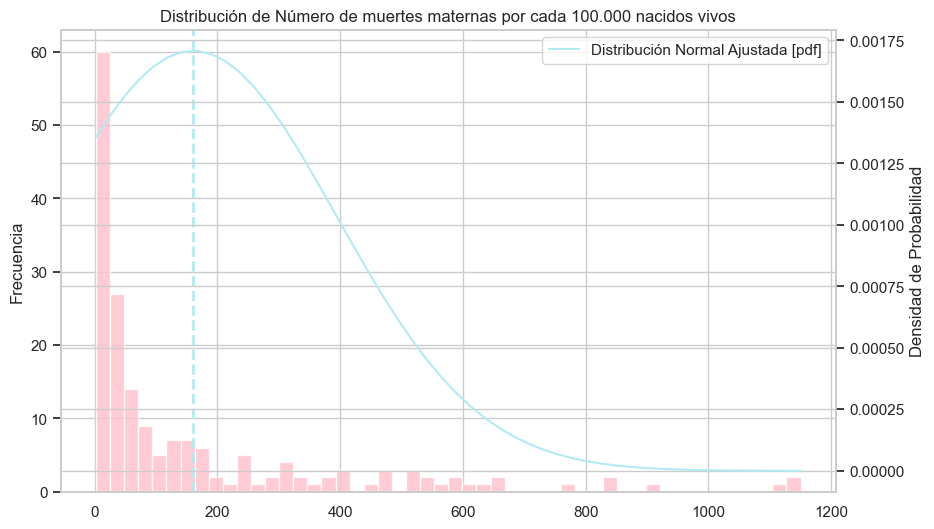

El promedio de Número de muertes maternas por cada 100.000 nacidos vivos es: 160.39
La mediana de Número de muertes maternas por cada 100.000 nacidos vivos es: 53.00
La(s) moda(s) de Número de muertes maternas por cada 100.000 nacidos vivos es(son):
5.00
La desviación estándar de Número de muertes maternas por cada 100.000 nacidos vivos es: 233.50
Los quintiles de Número de muertes maternas por cada 100.000 nacidos vivos son:
0.2       9.0
0.4      33.0
0.6      89.0
0.8     289.0
1.0    1150.0
Name: Maternal mortality ratio, dtype: float64
El rango de Número de muertes maternas por cada 100.000 nacidos vivos es: 1148.00


In [372]:
# Se utiliza Maternal mortality ratio para exploración de medidas estadísticas y gráficas
promedio = df['Maternal mortality ratio'].mean()
mediana = df['Maternal mortality ratio'].median()
moda = df['Maternal mortality ratio'].mode()
desviacion_std = df['Maternal mortality ratio'].std()
quintiles = df['Maternal mortality ratio'].quantile([0.2, 0.4, 0.6, 0.8, 1.0])
rango = df['Maternal mortality ratio'].max() - df['Maternal mortality ratio'].min()
mínimo = df['Maternal mortality ratio'].min()
máximo = df['Maternal mortality ratio'].max()
# Se genera puntos en el rango de valores mínimo y máximo de Maternal mortality ratio
x = np.linspace(mínimo, máximo)
# Se calcula la función de densidad de probabilidad [pdf] para la distribución normal
pdf = norm.pdf(x,loc=promedio,scale=desviacion_std)


fig, ax1 = plt.subplots(figsize=(10,6))
ax1.hist(df['Maternal mortality ratio'], bins=50, color='#FFC0CB', alpha=0.8, label='Rosado pastel')
ax1.axvline(x=promedio, color='#B2EBF2', linestyle='dashed', linewidth=2, label='Promedio')

ax2 = ax1.twinx()
ax2.plot(x, pdf, color='#B2EBF2', label='Distribución Normal Ajustada [pdf]')

ax1.set_ylabel('Frecuencia')
ax2.set_ylabel('Densidad de Probabilidad')

plt.title('Distribución de Número de muertes maternas por cada 100.000 nacidos vivos')
plt.xlabel('Número de muertes maternas por cada 100.000 nacidos vivos')
plt.grid(True)
plt.legend()
plt.show()
# Se muestra resultados
print(f"El promedio de Número de muertes maternas por cada 100.000 nacidos vivos es: {promedio:.2f}")
print(f"La mediana de Número de muertes maternas por cada 100.000 nacidos vivos es: {mediana:.2f}")
print(f"La(s) moda(s) de Número de muertes maternas por cada 100.000 nacidos vivos es(son):")
for m in moda:
    print(F"{m:.2f}")
print(f"La desviación estándar de Número de muertes maternas por cada 100.000 nacidos vivos es: {desviacion_std:.2f}")
print(f"Los quintiles de Número de muertes maternas por cada 100.000 nacidos vivos son:")
print(quintiles)
print(f"El rango de Número de muertes maternas por cada 100.000 nacidos vivos es: {rango:.2f}")

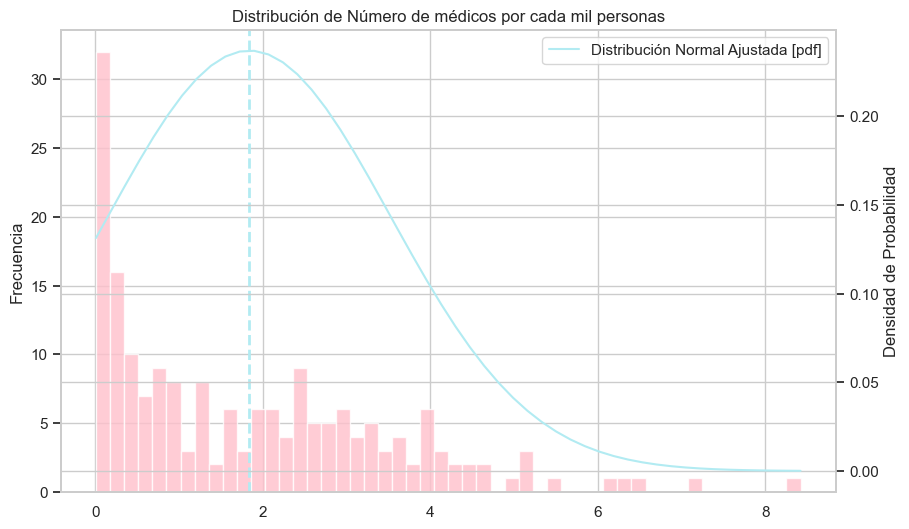

El promedio de Número de médicos por cada mil personas es: 1.84
La mediana de Número de médicos por cada mil personas es: 1.46
La(s) moda(s) de Número de médicos por cada mil personas es(son):
0.08
La desviación estándar de Número de médicos por cada mil personass es: 1.68
Los quintiles de Número de médicos por cada mil personas son:
0.2    0.210
0.4    0.900
0.6    2.110
0.8    3.234
1.0    8.420
Name: Physicians per thousand, dtype: float64
El rango de Número de médicos por cada mil personas es: 8.41


In [376]:
# Se utiliza Physicians per thousand para exploración de medidas estadísticas y gráficas
promedio = df['Physicians per thousand'].mean()
mediana = df['Physicians per thousand'].median()
moda = df['Physicians per thousand'].mode()
desviacion_std = df['Physicians per thousand'].std()
quintiles = df['Physicians per thousand'].quantile([0.2, 0.4, 0.6, 0.8, 1.0])
rango = df['Physicians per thousand'].max() - df['Physicians per thousand'].min()
mínimo = df['Physicians per thousand'].min()
máximo = df['Physicians per thousand'].max()
# Se genera puntos en el rango de valores mínimo y máximo de Physicians per thousand
x = np.linspace(mínimo, máximo)
# Se calcula la función de densidad de probabilidad [pdf] para la distribución normal
pdf = norm.pdf(x,loc=promedio,scale=desviacion_std)


fig, ax1 = plt.subplots(figsize=(10,6))
ax1.hist(df['Physicians per thousand'], bins=50, color='#FFC0CB', alpha=0.8, label='Rosado pastel')
ax1.axvline(x=promedio, color='#B2EBF2', linestyle='dashed', linewidth=2, label='Promedio')

ax2 = ax1.twinx()
ax2.plot(x, pdf, color='#B2EBF2', label='Distribución Normal Ajustada [pdf]')

ax1.set_ylabel('Frecuencia')
ax2.set_ylabel('Densidad de Probabilidad')

plt.title('Distribución de Número de médicos por cada mil personas')
plt.xlabel('Número de médicos por cada mil personas')
plt.grid(True)
plt.legend()
plt.show()
# Se muestra resultados
print(f"El promedio de Número de médicos por cada mil personas es: {promedio:.2f}")
print(f"La mediana de Número de médicos por cada mil personas es: {mediana:.2f}")
print(f"La(s) moda(s) de Número de médicos por cada mil personas es(son):")
for m in moda:
    print(F"{m:.2f}")
print(f"La desviación estándar de Número de médicos por cada mil personass es: {desviacion_std:.2f}")
print(f"Los quintiles de Número de médicos por cada mil personas son:")
print(quintiles)
print(f"El rango de Número de médicos por cada mil personas es: {rango:.2f}")

<span style="color:#87CEEB; font-size:20px; font-weight:bold;">3.</span>
<span style="font-size:15px;">Considera los dos pares de variables anteriores y elimina en cada caso los faltantes
y atípicos. Justifica en cada caso tu procedimiento.</span><br>

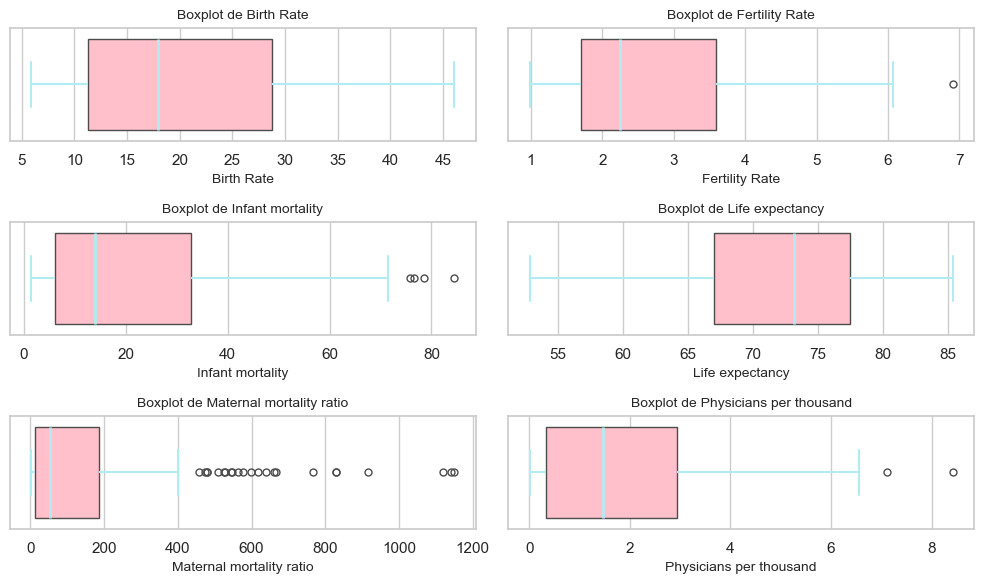

In [382]:
# Se identifican las columnas numéricas del DataFrame
col_numericas = df.select_dtypes(include=['float64', 'int64']).columns
# Se crear una figura con 3 filas y 2 columnas de subgráficos
fig, axes = plt.subplots(3, 2, figsize=(10, 6))
axes=axes.flatten()
# Se crean boxplots para cada columna numérica
for i, col in enumerate(col_numericas):
    sns.boxplot(
        data=df,
        x=col,
        ax=axes[i],
        boxprops=dict(facecolor='#FFC0CB'),
        medianprops=dict(color='#B2EBF2', linewidth=2),
        whiskerprops=dict(color='#B2EBF2', linewidth=1.5),
        capprops=dict(color='#B2EBF2', linewidth=1.5),
        flierprops=dict(marker='o', color='#B2EBF2',markersize=5)
    )
# Se crean los títulos
    axes[i].set_title(f'Boxplot de {col}', fontsize=10)
    axes[i].set_xlabel(col, fontsize=10)
# Se setea layout para evitar superposición
plt.tight_layout()
# Se muestra el gráfico
plt.show()

<span style="font-size:15px;">Más arriba observamos que:<br>
[1] Birth Rate tiene 6 valores nulos, tiene aparentemente 2 poblaciones diferenciadas y un rango relativamente alto<br>
[2] Fertility Rate tiene 7 valores nulos y 1 outlier observable en el gráfico<br>
[3] Infant mortality tiene 6 valores nulos y más de un outlier observable en el gráfico<br>
[4] Life expectancy tiene 8 valores nulos y ningún outlier observable gráficamente<br>
[5] Maternal mortality ratio tiene 14 valores nulos y muchos outliers graficados<br>
[6] Physicians per thousand tiene 7 valores nulos y 2 outliers observables en el gráfico<br>
Se escogerán 2 pares (4 columnas) para eliminar los faltantes y atípicos:<br>
Fertility Rate<br>
Infant mortality<br>
Maternal mortality ratio<br>
Physicians per thousand<br>
</span>

In [385]:
# Se copia el DataFrame original para no modificar los datos originales
df_limpio = df.copy()

# Se genera lista de columnas para las que se eliminarán los outliers
columnas = ['Fertility Rate', 'Infant mortality', 'Maternal mortality ratio', 'Physicians per thousand']

# Se eliminan las filas con valores faltantes en las columnas especificadas
df_limpio = df_limpio.dropna(subset=columnas)

# Se genera función para eliminar outliers usando el rango intercuartílico (IQR)
def eliminar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
# Se filtran las filas que están dentro de los límites del IQR
    df_filtrado = df[(df[columna] >= limite_inferior) & (df[columna] <= limite_superior)]
    return df_filtrado

# Se eliminan outliers acumulativamente de todas las columnas especificadas
for col in columnas:
    df_limpio = eliminar_outliers(df_limpio, col)

# Se evidencia el número de filas antes y después de la limpieza
print(f"Datos originales: {df.shape[0]} filas")
print(f"Datos después de eliminar faltantes y outliers: {df_limpio.shape[0]} filas")

# Se observa estructura limpia sin outliers ni faltantes
df_limpio.info()
# Se determinan valores nulos
df_limpio.apply(lambda x: sum(x.isnull()), axis=0)


Datos originales: 195 filas
Datos después de eliminar faltantes y outliers: 156 filas
<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, 1 to 193
Data columns (total 27 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    156 non-null    object 
 1   Density
(P/Km2)                            156 non-null    object 
 2   Agricultural Land( %)                      156 non-null    object 
 3   Land Area(Km2)                             156 non-null    object 
 4   Armed Forces size                          146 non-null    object 
 5   Birth Rate                                 156 non-null    float64
 6   Co2-Emissions                              156 non-null    object 
 7   CPI                                        152 non-null    object 
 8   CPI Change (%)                             153 non-null    object 
 9   Fertility Rate   

Country                                       0
Density\n(P/Km2)                              0
Agricultural Land( %)                         0
Land Area(Km2)                                0
Armed Forces size                            10
Birth Rate                                    0
Co2-Emissions                                 0
CPI                                           4
CPI Change (%)                                3
Fertility Rate                                0
Forested Area (%)                             0
Gasoline Price                                9
GDP                                           0
Gross primary education enrollment (%)        1
Gross tertiary education enrollment (%)       3
Infant mortality                              0
Life expectancy                               0
Maternal mortality ratio                      0
Minimum wage                                 31
Out of pocket health expenditure              1
Physicians per thousand                 

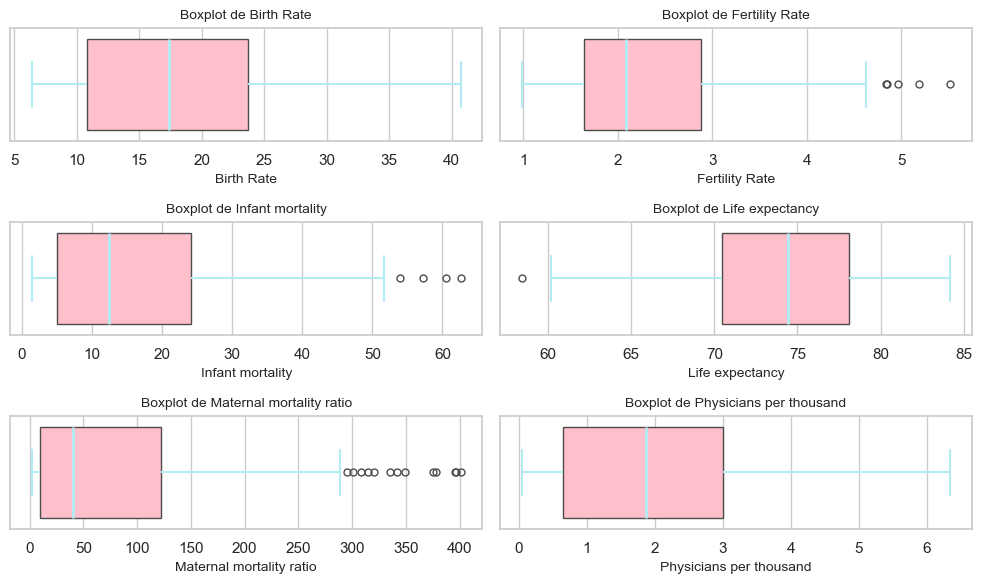

In [387]:
# Se identifican las columnas numéricas del DataFrame
col_numericas_df_limpio = df_limpio.select_dtypes(include=['float64', 'int64']).columns
# Se crear una figura con 3 filas y 2 columnas de subgráficos
fig, axes = plt.subplots(3, 2, figsize=(10, 6))
axes=axes.flatten()
# Se crean boxplots para cada columna numérica
for i, col in enumerate(col_numericas_df_limpio):
    sns.boxplot(
        data=df_limpio,
        x=col,
        ax=axes[i],
        boxprops=dict(facecolor='#FFC0CB'),
        medianprops=dict(color='#B2EBF2', linewidth=2),
        whiskerprops=dict(color='#B2EBF2', linewidth=1.5),
        capprops=dict(color='#B2EBF2', linewidth=1.5),
        flierprops=dict(marker='o', color='#B2EBF2',markersize=5)
    )
# Se crean los títulos
    axes[i].set_title(f'Boxplot de {col}', fontsize=10)
    axes[i].set_xlabel(col, fontsize=10)
# Se setea layout para evitar superposición
plt.tight_layout()
# Se muestra el gráfico
plt.show()

<span style="color:#87CEEB; font-size:20px; font-weight:bold;">4.</span>
<span style="font-size:15px;">Construye un gráfico para verificar la correlación entre estas variables, ahora con los
datos preparados. Compara con lo obtenido anteriormente.</span>

<span style="color:#87CEEB; font-size:20px; font-weight:bold;">5.</span>
<span style="font-size:15px;">Realiza lo mismo para comparar la cantidad de médicos por cada mil personas y la
esperanza de vida. ¿Qué puedes concluir?.</span>

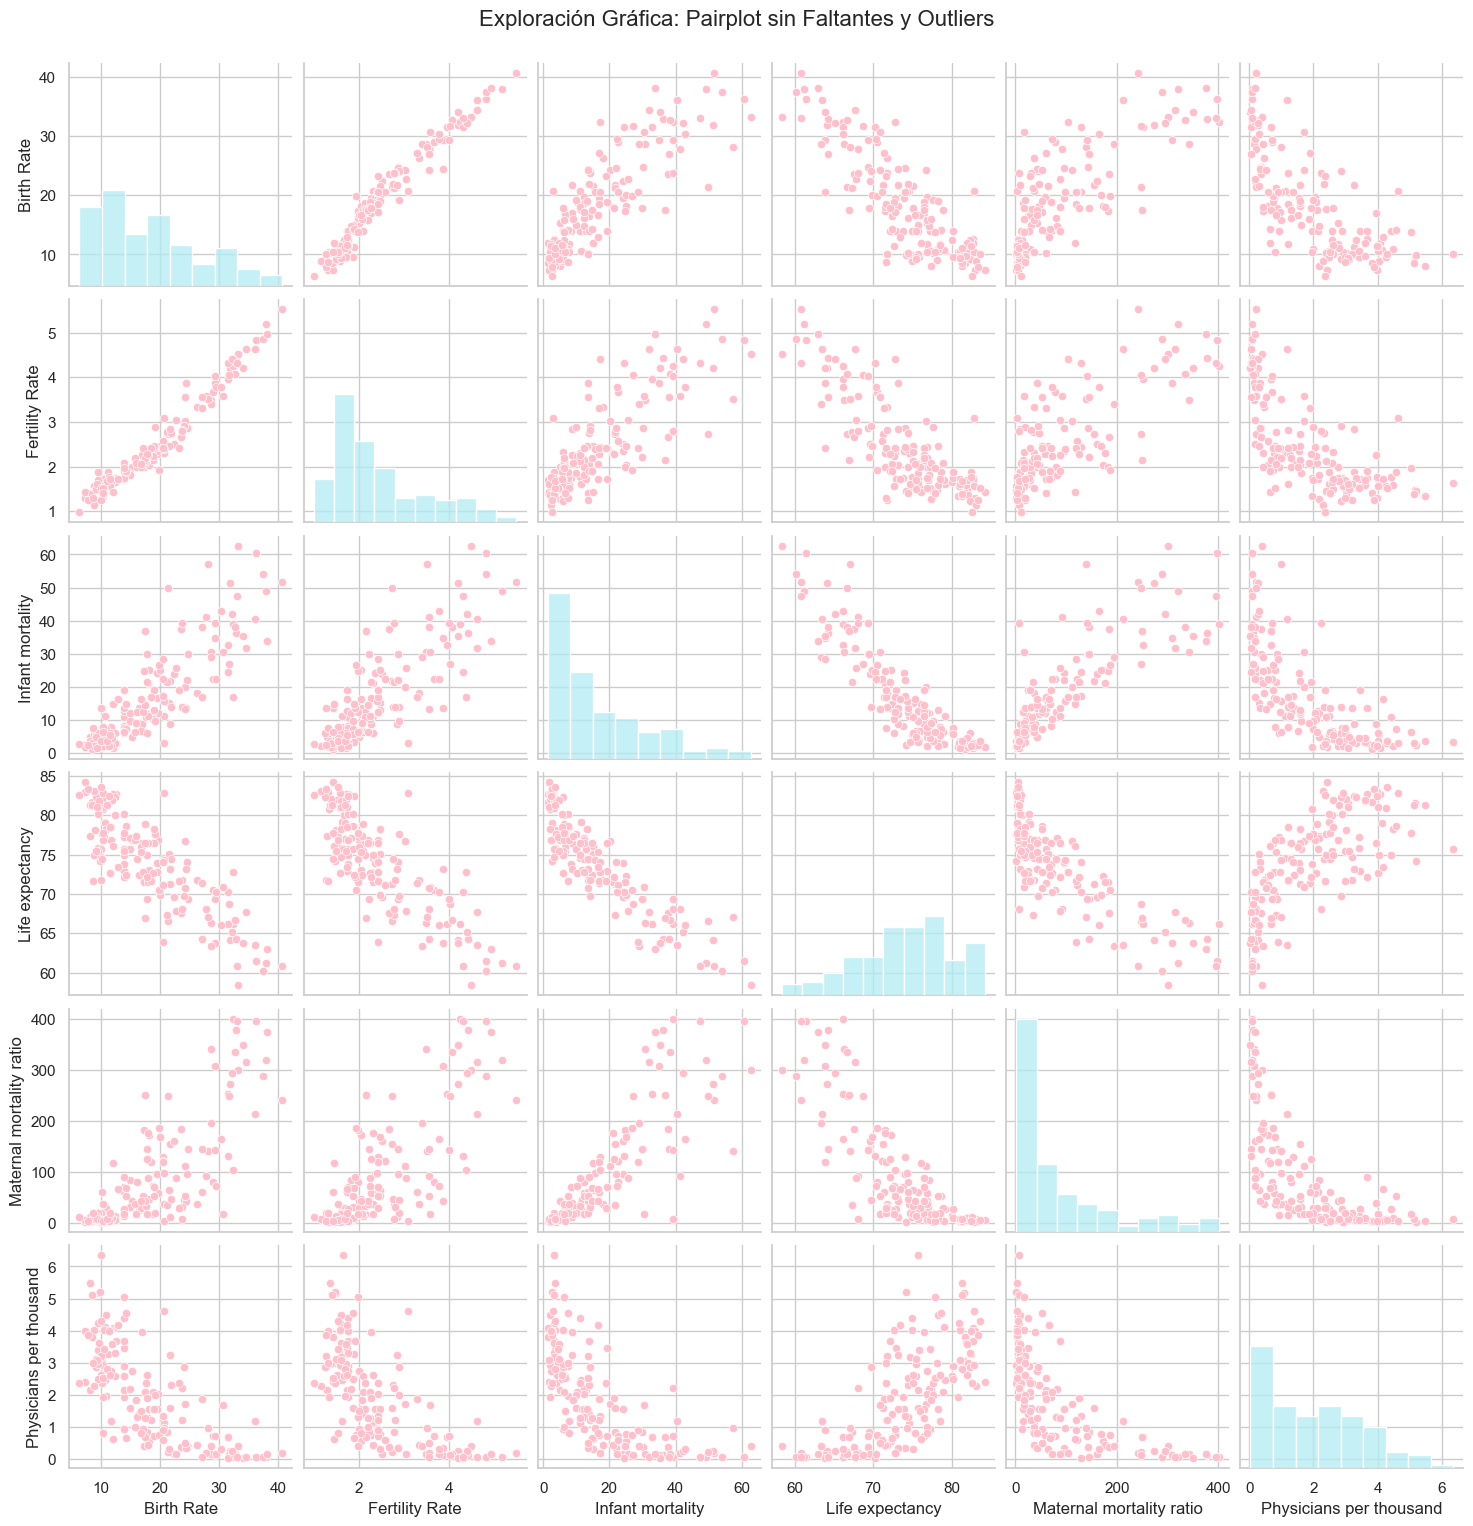

In [391]:
# Se explora gráficamente a través de Pairplot
sns.pairplot(df_limpio, diag_kind='hist', plot_kws={'color':'#FFC0CB'}, diag_kws={'color':'#B2EBF2'})
plt.suptitle("Exploración Gráfica: Pairplot sin Faltantes y Outliers", fontsize=16, y=1.02)
plt.show()

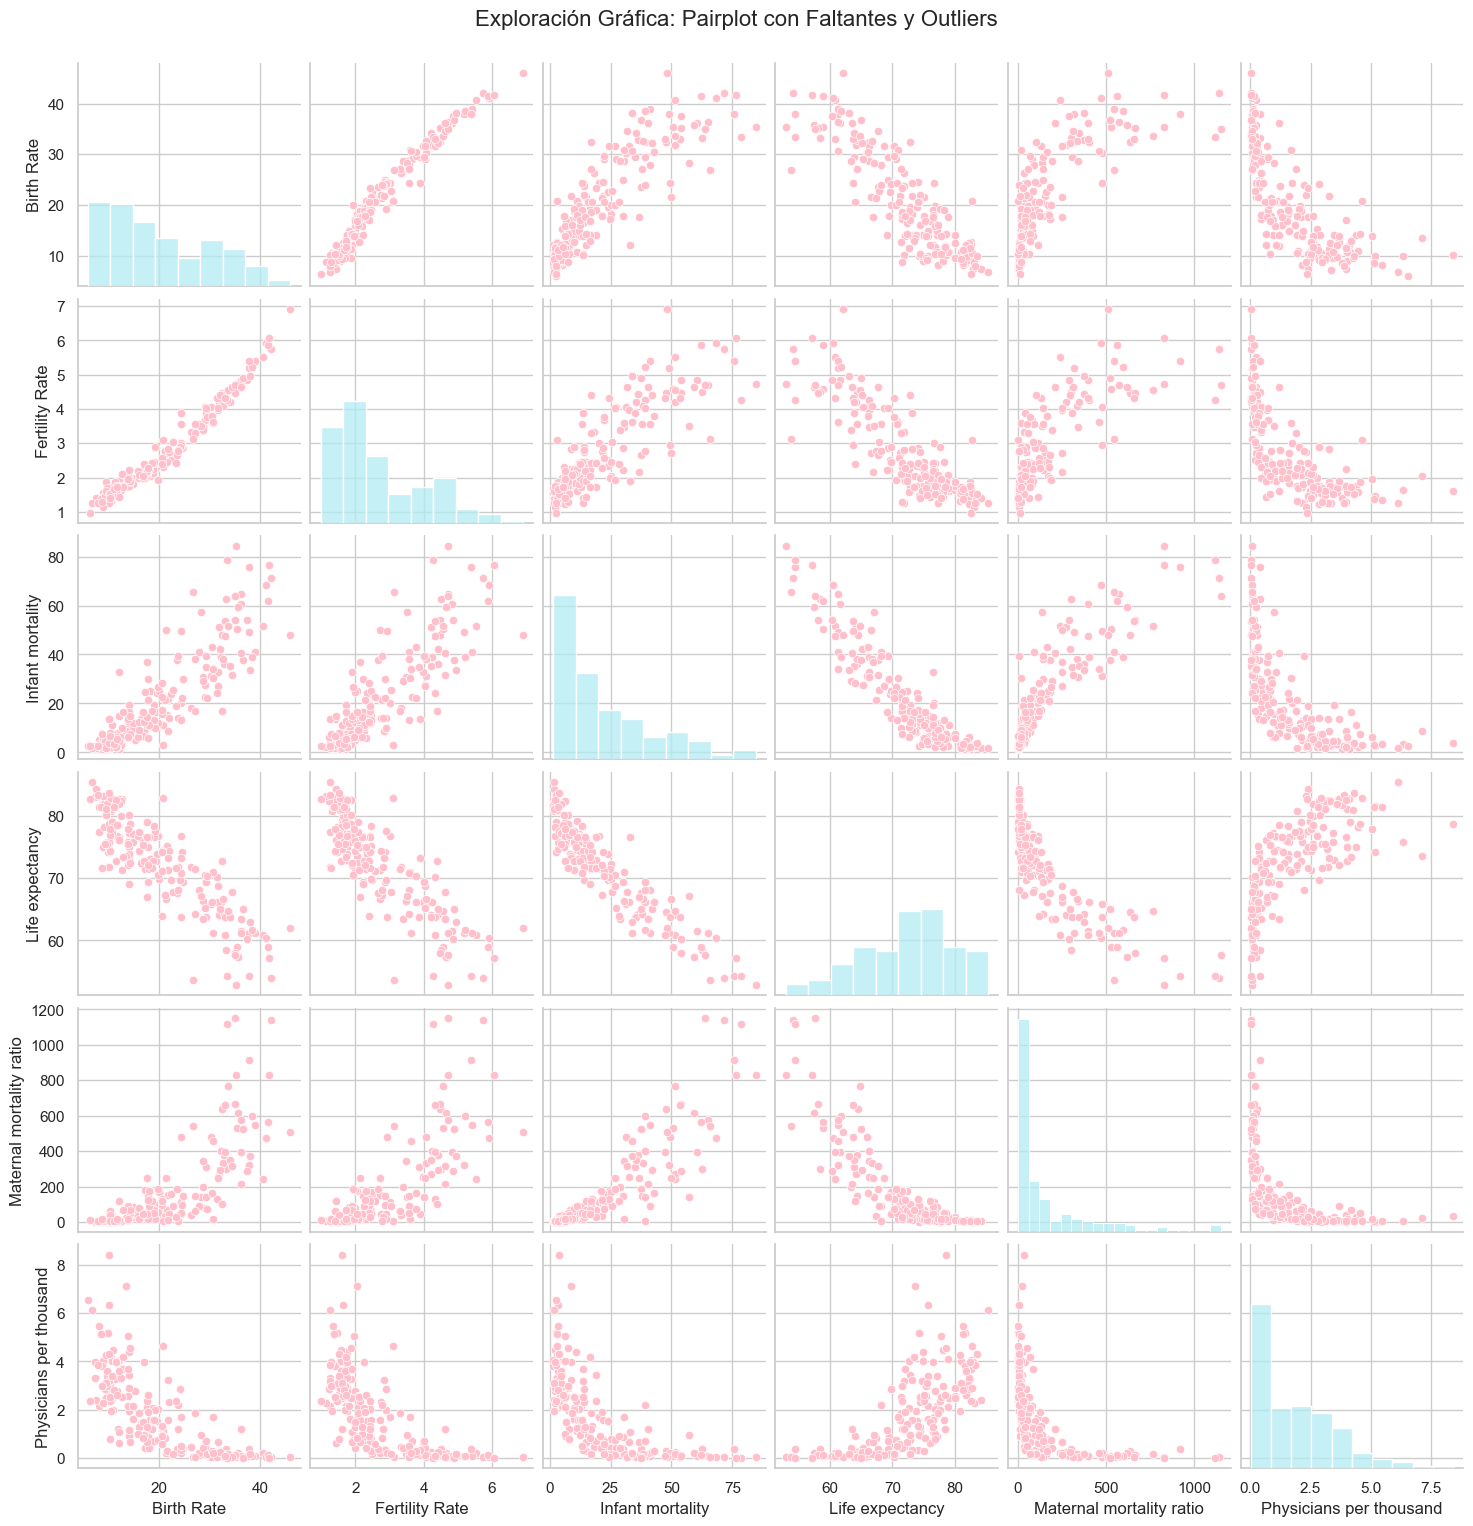

In [392]:
# Se explora gráficamente a través de Pairplot
sns.pairplot(df, diag_kind='hist', plot_kws={'color':'#FFC0CB'}, diag_kws={'color':'#B2EBF2'})
plt.suptitle("Exploración Gráfica: Pairplot con Faltantes y Outliers", fontsize=16, y=1.02)
plt.show()

<span style="font-size:15px;">Las tendencias en general de todas las columnas y posibles comparaciones se mantienen pero se acota la dispersión<br>
Respecto particularmente a la correlación de Physicians per thousand y Life expectancy se mantiene positiva pero claramente menos dispersa
</span>

In [399]:
# Buena práctica: se genera un resumen estadístico para las 6 columnas numéricas con df.describe()
df_limpio.describe()

,Birth Rate,Fertility Rate,Infant mortality,Life expectancy,Maternal mortality ratio,Physicians per thousand
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,18.441859,2.427564,16.646154,73.982051,85.615385,1.959231
std,8.397116,1.028057,14.479545,5.975471,103.764402,1.490951
min,6.400000,0.980000,1.400000,58.400000,2.000000,0.040000
25%,10.850000,1.645000,5.000000,70.450000,10.000000,0.655000
50%,17.405000,2.085000,12.400000,74.450000,40.500000,1.865000
75%,23.725000,2.875000,24.175000,78.125000,122.000000,3.002500
max,40.730000,5.520000,62.600000,84.200000,401.000000,6.350000


<span style="font-size:15px;">En promedio, sin haber realizado limpieza de datos:<br>
[1] nacen 20 niños por cada 1.000 habitantes por año cuando no se han limpiado los datos versus 18 después de la limpieza<br>
[2] se mantiene la conclusión que nacen entre 2 y 3 niños de una mujer en toda su vida una vez realizada la limpieza de datos<br>
[3] mueren 21 niños por cada 1.000 nacidos vivos antes de cumplir 1 año de edad en la base de datos original mientras que 16 una vez que se ha realizado la limpieza<br>
[4] se espera que un recién nacido viva en torno a los 72 años en la base original y cais 74 años después de la limpieza<br>
[5] mueren cerca de 160 madres por cada 100.000 nacidos vivos si se considera la base de datos original y casi 86 en la base de datos que se limpió<br>
[6] existen casi 2 médicos por cada 1.000 personas tanto en la base original como en la base limpia<br>
</span>

<span style="color:#87CEEB; font-size:20px; font-weight:bold;">6.</span>
<span style="font-size:15px;"> Construye un gráfico para representar la población total de los países y su producto interno bruto. Prepara los datos y escoge el gráfico adecuado (si es necesario, limpia y/o transforma los datos). Justifica.</span><br>

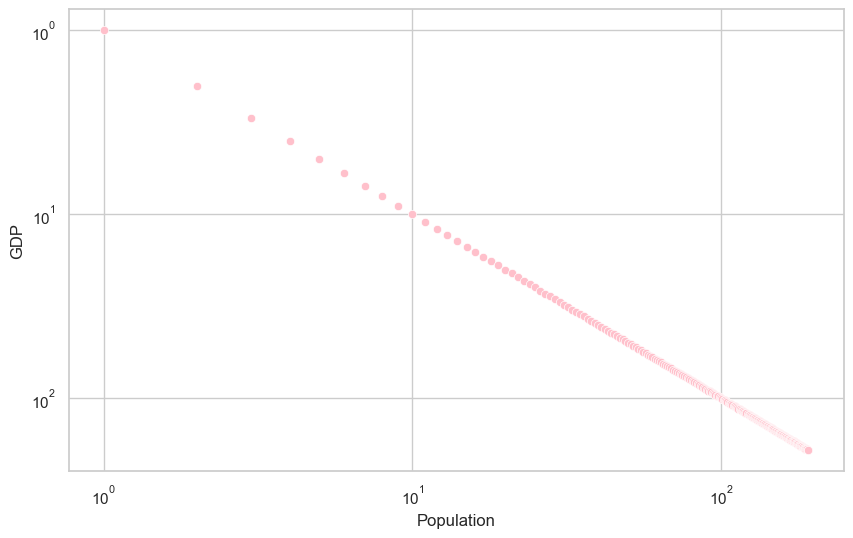

In [411]:
# Se limpia, se ajusta escala y se grafica
datos_limpios_06 = df.dropna(subset=['Population','GDP'])
plt.figure(figsize=(10,6))
sns.scatterplot(data=datos_limpios_06, x='Population', y='GDP', color = '#FFC0CB')
plt.xscale('log')
plt.yscale('log')
plt.show()

<span style="font-size:15px;">Se limpiaron los datos nulos y se cambió la escala de ambos ejes para apreciar mejor el gráfico<br>
Se observa una correlación negativa a menor Población mayor PIB
</span>

<span style="color:#87CEEB; font-size:20px; font-weight:bold;">7.</span>
<span style="font-size:15px;"> Escoge otro par de datos, límpialos, prepáralos y analiza su posible relación. Justifica utilizando las herramientas vistas y gráficos adecuados</span><br>

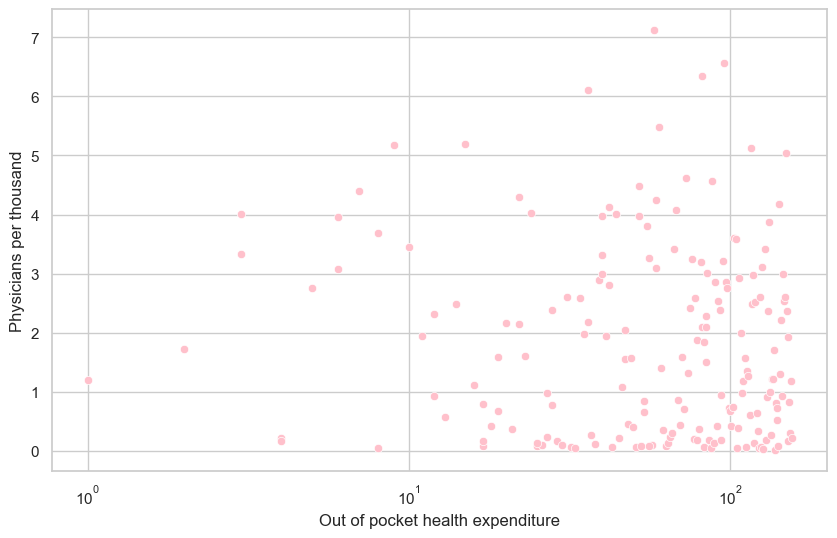

In [419]:
# Se limpia, se ajusta escala y se grafica
datos_limpios_06 = df.dropna(subset=['Out of pocket health expenditure','Physicians per thousand'])
plt.figure(figsize=(10,6))
sns.scatterplot(data=datos_limpios_06, x='Out of pocket health expenditure', y='Physicians per thousand', color = '#FFC0CB')
plt.xscale('log')
plt.show()

<span style="font-size:15px;">Se limpiaron los datos nulos y se cambió la escala del eje "y" para apreciar mejor el gráfico<br>
No es posible concluir que exista correlación entre ambas variables
</span>